In [1]:
import pandas as pd
import yfinance as yf
import datetime as dt


In [4]:
symbol="AXISBANK.NS"
start=dt.datetime(2021,7,1)
end=dt.datetime(2022,1,28)
stk_data=yf.download(symbol,start=start,end=end)

[*********************100%%**********************]  1 of 1 completed


In [7]:
stk_data.to_csv("AxisBank_Stock.csv",index=False)

In [8]:
stk_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-07-01,750.000000,754.400024,744.500000,746.450012,744.555725,5695690
2021-07-02,747.599976,752.849976,744.000000,750.650024,748.745117,3557647
2021-07-05,757.099976,762.000000,753.400024,760.349976,758.420410,4680089
2021-07-06,757.000000,767.000000,755.200012,758.349976,756.425476,5529485
2021-07-07,755.900024,764.000000,752.250000,762.900024,760.963989,3573368
...,...,...,...,...,...,...
2022-01-20,731.049988,737.150024,722.150024,728.900024,727.050232,8505400
2022-01-21,722.000000,725.250000,708.049988,712.500000,710.691895,10689060
2022-01-24,715.000000,716.400024,688.200012,704.599976,702.811890,8812501


In [10]:
stkdata=stk_data[["Open","High","Low","Close"]]


In [12]:
stkdata

,Open,High,Low,Close
Date,,,,
2021-07-01,750.000000,754.400024,744.500000,746.450012
2021-07-02,747.599976,752.849976,744.000000,750.650024
2021-07-05,757.099976,762.000000,753.400024,760.349976
2021-07-06,757.000000,767.000000,755.200012,758.349976
2021-07-07,755.900024,764.000000,752.250000,762.900024
...,...,...,...,...
2022-01-20,731.049988,737.150024,722.150024,728.900024
2022-01-21,722.000000,725.250000,708.049988,712.500000
2022-01-24,715.000000,716.400024,688.200012,704.599976


In [13]:
column="Close"
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
data1=ms.fit_transform(stk_data[[column]])
print("Length : ",data1.shape)

Length :  (144, 1)


In [15]:
training_size=round(len(data1)*0.80)
print("Training Size : ",training_size)
x_train=data1[:training_size]
x_test=data1[training_size:]
print("x_train length : ", x_train.shape)
print("x_test length : " , x_test.shape)
y_train=data1[:training_size]
y_test=data1[training_size:]
print("y_train length : ", y_train.shape)
print("y_test length : " , y_test.shape)

Training Size :  115
x_train length :  (115, 1)
x_test length :  (29, 1)
y_train length :  (115, 1)
y_test length :  (29, 1)


In [17]:
import warnings
warnings.filterwarnings("ignore")

In [18]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
trends=['n','t','c','ct']
orders=[(0,0,1),(0,0,2)]
for od in orders:
    for td in trends:
        model=ARIMA(x_train,order=od,trend=td)
        model_fit=model.fit()
        # making prediction
        y_pred=model_fit.predict(len(x_train),len(data1)-1)
        from stockFunctions import rmsemape
        print("Order : {} , Tred : {} ". format(od,td))
        rmsemape(y_test,y_pred)
        print("_______________________________________")

Order : (0, 0, 1) , Tred : n 
RMSE-Testset: 0.334147686868834
maPe-Testset: 0.9944238368220875
_______________________________________
Order : (0, 0, 1) , Tred : t 
RMSE-Testset: 0.5255552342155572
maPe-Testset: 2.972965868896446
_______________________________________
Order : (0, 0, 1) , Tred : c 
RMSE-Testset: 0.27956151526061096
maPe-Testset: 1.6993619209809576
_______________________________________
Order : (0, 0, 1) , Tred : ct 
RMSE-Testset: 0.18503655617210202
maPe-Testset: 1.0691552241881883
_______________________________________
Order : (0, 0, 2) , Tred : n 
RMSE-Testset: 0.3322278841211241
maPe-Testset: 0.9501868509035892
_______________________________________
Order : (0, 0, 2) , Tred : t 
RMSE-Testset: 0.5164554200517593
maPe-Testset: 2.911318913897737
_______________________________________
Order : (0, 0, 2) , Tred : c 
RMSE-Testset: 0.275927687119572
maPe-Testset: 1.677023672158562
_______________________________________
Order : (0, 0, 2) , Tred : ct 
RMSE-Testset: 0.184

In [19]:
od=(0,0,2)
td='ct'
model=ARIMA(x_train,order=od,trend=td)
model_fit=model.fit()
# making prediction
y_pred=model_fit.predict(len(x_train),len(data1)-1)
from stockFunctions import rmsemape
print("Order : {} , Tred : {} ". format(od,td))
rmsemape(y_test,y_pred)
print("_______________________________________")

Order : (0, 0, 2) , Tred : ct 
RMSE-Testset: 0.18466837969172675
maPe-Testset: 1.0698570055772574
_______________________________________


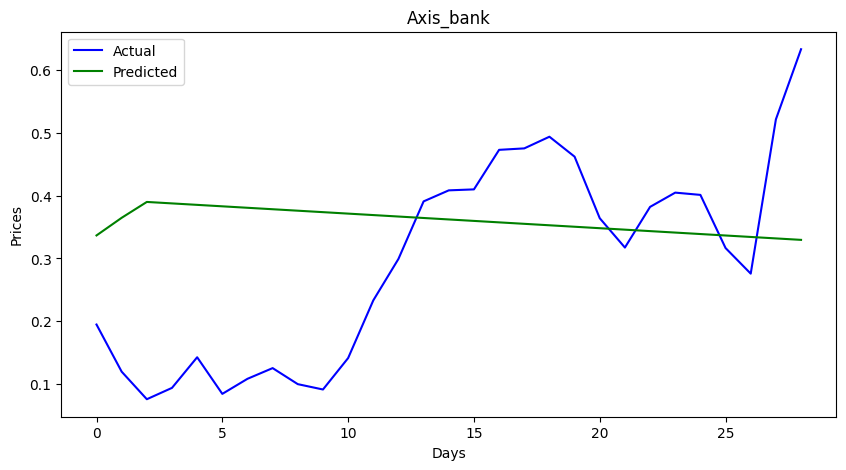

In [20]:
from stockFunctions import graph
graph(y_test,y_pred,"Actual","Predicted","Axis_bank","Days","Prices")

In [21]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(y_test,[column])
actual_stock_price_test_ori=ms.inverse_transform(aTestNormTable)
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,[column])

In [22]:
from stockFunctions import conversionSingle
pTestNormTable=conversionSingle(y_pred,[column])
predicted_stock_price_test_ori=ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP=conversionSingle(predicted_stock_price_test_ori,[column])

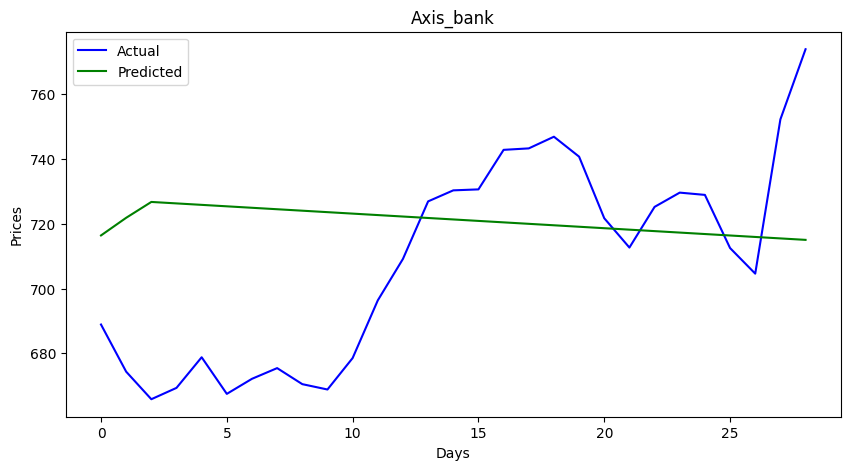

In [23]:
from stockFunctions import graph
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriP,"Actual","Predicted","Axis_bank","Days","Prices")

In [24]:
from stockFunctions import rmsemape
rmsemape(actual_stock_price_test_oriA,predicted_stock_price_test_oriP)

RMSE-Testset: 35.82566566019497
maPe-Testset: 0.04274007501119806


In [25]:
forecast=model_fit.predict(len(data1), len(data1)+3)
forecast

array([0.32717307, 0.32485293, 0.3225328 , 0.32021266])

In [26]:
from stockFunctions import conversionSingle
fTestNormTable=conversionSingle(forecast,["CloseFore"])
forecast_stock_price_test_ori=ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_orif=conversionSingle(forecast_stock_price_test_ori,["CloseFore"])

In [27]:
forecast_stock_price_test_orif

,CloseFore
0,714.571551
1,714.121445
2,713.671338
3,713.221232


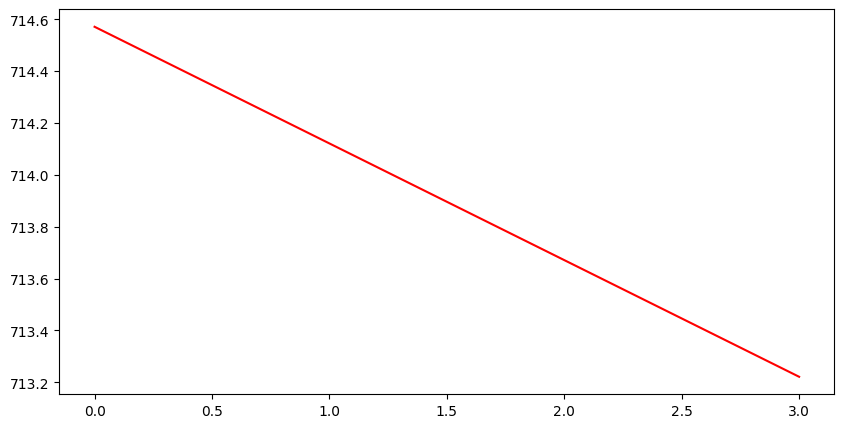

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(actual_stock_price_test_oriA[116:145], color = 'blue', label="Actual")
plt.plot(forecast_stock_price_test_orif, color = 'red', label ="Predicted")